In [24]:
import argparse

args = {
    'config': 'configs/scalarflowreal.txt',
    'expname': 'exp_real/density_256_128',
    'basedir': './logs',
    'datadir': './data/ScalarReal',
    'encoder': 'ingp',
    'N_rand': 256,
    'N_time': 1,
    'lrate': 0.01,
    'lrate_decay': 100000,
    'N_iters': 300000,
    'no_reload': False,
    'ft_path': None,
    'N_samples': 192,
    'perturb': 1.0,
    'render_only': False,
    'half_res': True,
    'i_print': 100,
    'i_weights': 100000,
    'i_video': 100000,
    'finest_resolution': 256,
    'finest_resolution_t': 128,
    'num_levels': 16,
    'base_resolution': 16,
    'base_resolution_t': 16,
    'log2_hashmap_size': 19,
    'feats_dim': 36,
    'tv_loss_weight': 1e-06
}
args = argparse.Namespace(**args)

In [25]:
from datamanager import PINFDataParserConfig, PINFNeRFDataManager, PINFNeRFDataManagerConfig
import pathlib
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config_datamanager: PINFNeRFDataManagerConfig = PINFNeRFDataManagerConfig(dataparser=PINFDataParserConfig(), )
config_datamanager.dataparser.data = pathlib.Path("../data/ScalarReal")
datamanager: PINFNeRFDataManager = config_datamanager.setup(device=device)

Caching all 480 images.

Output()

Caching all 120 images.

Output()

In [26]:
ray_bundle, batch = datamanager.next_train()
print(batch.keys())

dict_keys(['image', 'indices'])


In [27]:
from nerfstudio.data.utils.dataloaders import FixedIndicesEvalDataloader, RandIndicesEvalDataloader
import matplotlib.pyplot as plt

fixed_indices_eval_dataloader = FixedIndicesEvalDataloader(input_dataset=datamanager.train_dataset)
eval_dataloader = RandIndicesEvalDataloader(input_dataset=datamanager.train_dataset)

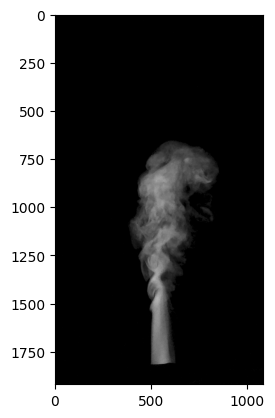

In [28]:
camera, batch = next(eval_dataloader)
plt.imshow(batch['image'])